# Library imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd

from numerical_utility import cubic_spline_interpolation
from numerical_utility import evaluate_spline
from numerical_utility import clamped_cubic_spline
from numerical_utility import lagrange_interpolation
from numerical_utility import newton_interpolation
from numerical_utility import divided_differences

# Q8

In [9]:
aapl = yf.download('AAPL', start='2020-09-01', end='2020-09-19', actions=False)  # actions=False removes dividends

[*********************100%***********************]  1 of 1 completed


In [10]:
aapl

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2020-09-01 00:00:00+00:00,130.982590,134.179993,134.800003,130.529999,132.759995,151948100
2020-09-02 00:00:00+00:00,128.268829,131.399994,137.979996,127.000000,137.589996,200119000
2020-09-03 00:00:00+00:00,117.999519,120.879997,128.839996,120.500000,126.910004,257599600
2020-09-04 00:00:00+00:00,118.077621,120.959999,123.699997,110.889999,120.070000,332607200
2020-09-08 00:00:00+00:00,110.131599,112.820000,118.989998,112.680000,113.949997,231366600
2020-09-09 00:00:00+00:00,114.524368,117.320000,119.139999,115.260002,117.260002,176940500
2020-09-10 00:00:00+00:00,110.785622,113.489998,120.500000,112.500000,120.360001,182274400
2020-09-11 00:00:00+00:00,109.331131,112.000000,115.230003,110.000000,114.570000,180860300


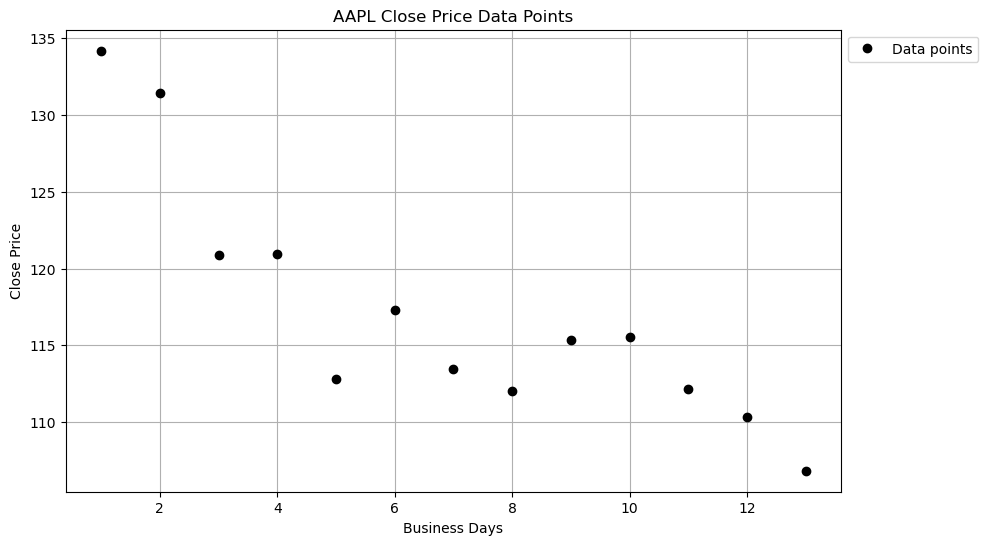

In [11]:
aapl.reset_index(inplace=True)

x = list(range(1, len(aapl) + 1))  # This will give [1, 2, 3, ..., number of rows in aapl]
y = aapl['Close'].values.tolist()  # Extract 'Close' prices as a list
data = tuple(zip(x,y))
# Plot the data points
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', color='black')
plt.xlabel('Business Days')
plt.ylabel('Close Price')
plt.title('AAPL Close Price Data Points')
plt.grid(True)
plt.legend(['Data points'], loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

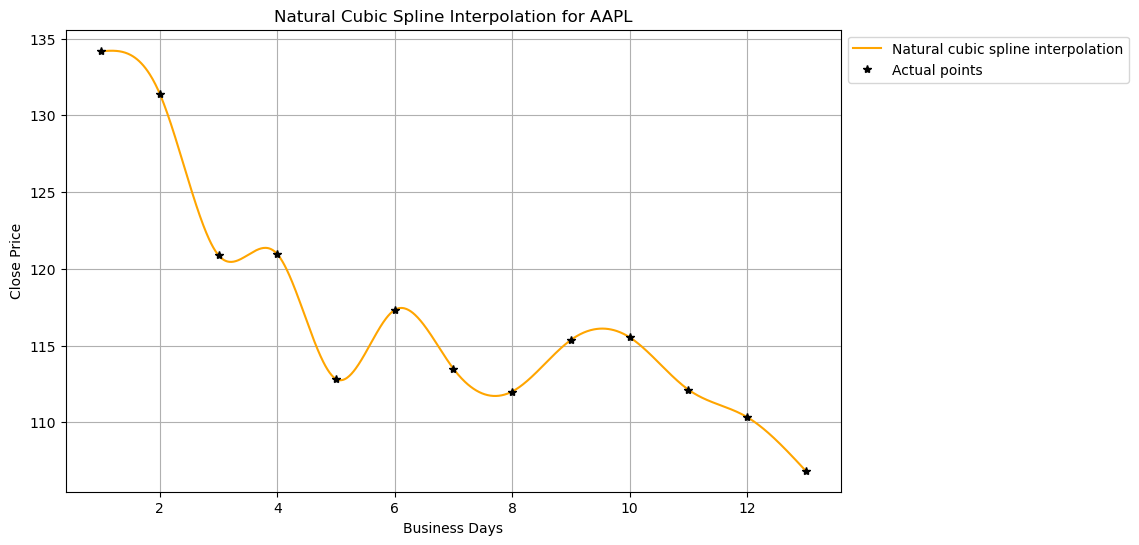

Interpolated price for AAPL for day x = 8.5: 113.58093181076717


In [12]:
# NATURAL CUBIC SPLINE INTERPOLATION

# Assuming aapl is your DataFrame and we have already handled its MultiIndex structure
x = list(range(1, len(aapl) + 1))  # Business days starting from 1
y = aapl[('Close', 'AAPL')].tolist()  # Access 'Close' column for 'AAPL' and convert to list

# Perform natural cubic spline interpolation using the functions from utility.py
a, b, c, d = cubic_spline_interpolation(x, y)

# Generate x values for a smooth plot and evaluate the spline at each x
x1 = np.linspace(min(x), max(x), 1000)
y1 = [evaluate_spline(i, x, a, b, c, d) for i in x1]

# Plot the natural cubic spline and actual data points
plt.figure(figsize=(10, 6))
plt.plot(x1, y1, color='orange', label='Natural cubic spline interpolation')
plt.plot(x, y, '*', color='black', label='Actual points')
plt.xlabel('Business Days')
plt.ylabel('Close Price')
plt.title('Natural Cubic Spline Interpolation for AAPL')
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Interpolated price at x = 8.5
interpolated_price = evaluate_spline(8.5, x, a, b, c, d)
print(f"Interpolated price for AAPL for day x = 8.5: {interpolated_price}")

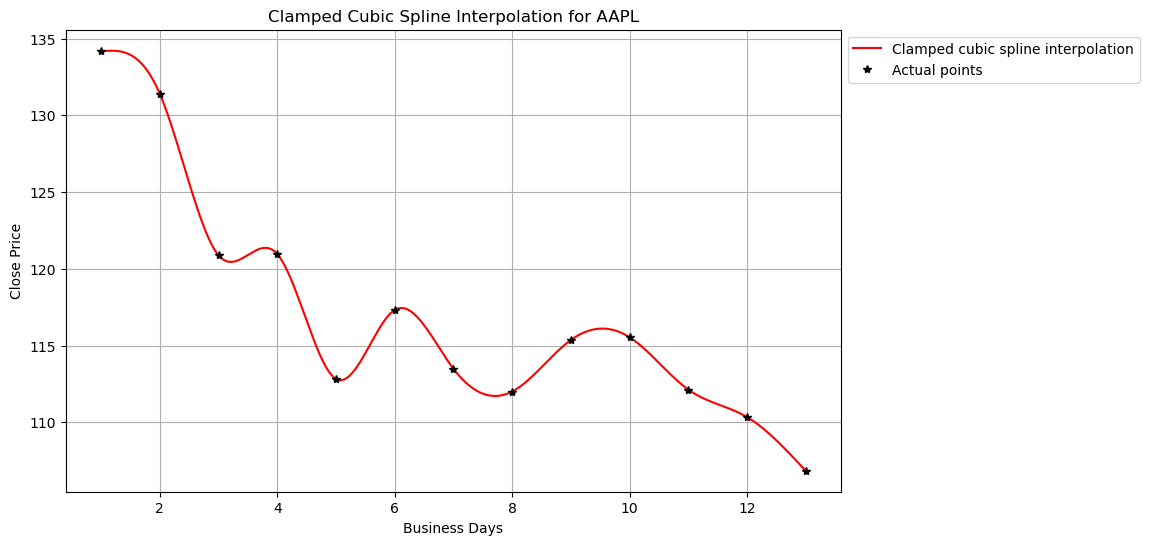

Interpolated price for AAPL for day x = 8.5: 113.58093181076717


In [13]:
# CLAMPED CUBIC SPLINE INTERPOLATION

# Define x and y using the MultiIndex column structure
x = list(range(1, len(aapl) + 1))  # Business days starting from 1
y = aapl[('Close', 'AAPL')].tolist()  # Access 'Close' column for 'AAPL' and convert to list

# Proceed with the rest of the interpolation code
# Specify clamped boundary derivatives (e.g., estimated or known derivatives at endpoints)
fpa = 0.0  # Replace with actual derivative at x[0] if known
fpb = 0.0  # Replace with actual derivative at x[-1] if known

# Perform clamped cubic spline interpolation
a, b, c, d = clamped_cubic_spline(x, y, fpa, fpb)

# Generate x values for smooth plotting and evaluate spline at each x
x1 = np.linspace(min(x), max(x), 1000)
y1 = [evaluate_spline(i, x, a, b, c, d) for i in x1]

# Plot the clamped cubic spline and actual data points
plt.figure(figsize=(10, 6))
plt.plot(x1, y1, color='red', label='Clamped cubic spline interpolation')
plt.plot(x, y, '*', color='black', label='Actual points')
plt.xlabel('Business Days')
plt.ylabel('Close Price')
plt.title('Clamped Cubic Spline Interpolation for AAPL')
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Interpolated price at x = 8.5
interpolated_price = evaluate_spline(8.5, x, a, b, c, d)
print(f"Interpolated price for AAPL for day x = 8.5: {interpolated_price}")

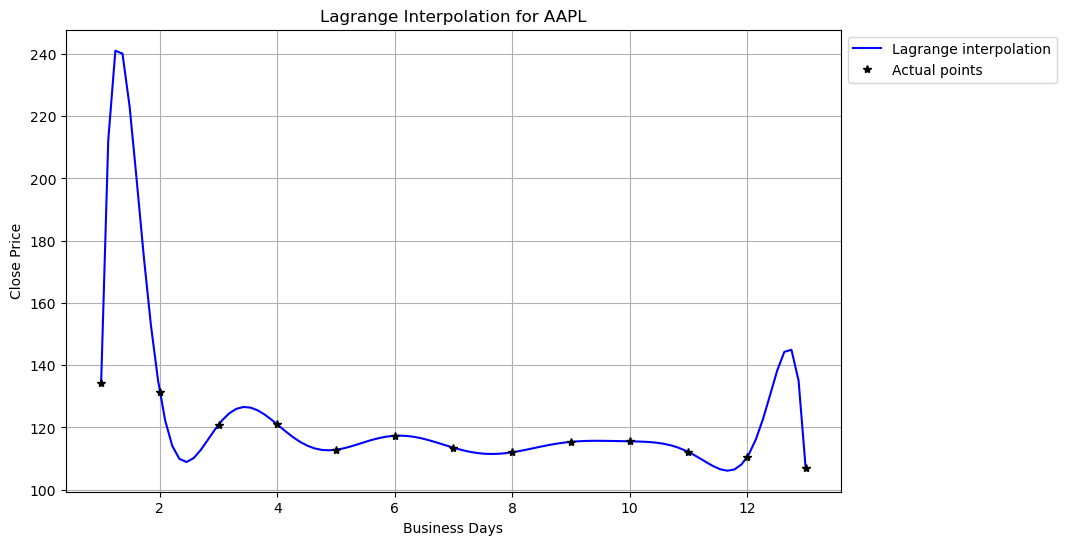

Interpolated price for AAPL for day x = 8.5: 113.87019050535491


In [14]:
# LAGRANGE INTERPOLATION

# Define x and y data
x = list(range(1, len(aapl) + 1))  # Business days starting from 1
y = aapl[('Close', 'AAPL')].tolist()  # Close prices

# Prepare the data points as (x, y) pairs
xy_points = list(zip(x, y))

# Generate values for plotting the Lagrange interpolation
x1 = np.linspace(min(x), max(x), 100)  # 100 points for smooth plotting
y1 = [lagrange_interpolation(xy_points, xi, len(x) - 1) for xi in x1]

# Plot the Lagrange interpolation and actual data points
plt.figure(figsize=(10, 6))
plt.plot(x1, y1, color='blue', label='Lagrange interpolation')
plt.plot(x, y, '*', color='black', label='Actual points')
plt.xlabel('Business Days')
plt.ylabel('Close Price')
plt.title('Lagrange Interpolation for AAPL')
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Interpolated price at x = 8.5 using Lagrange interpolation
interpolated_price = lagrange_interpolation(xy_points, 8.5, len(x) - 1)
print(f"Interpolated price for AAPL for day x = 8.5: {interpolated_price}")

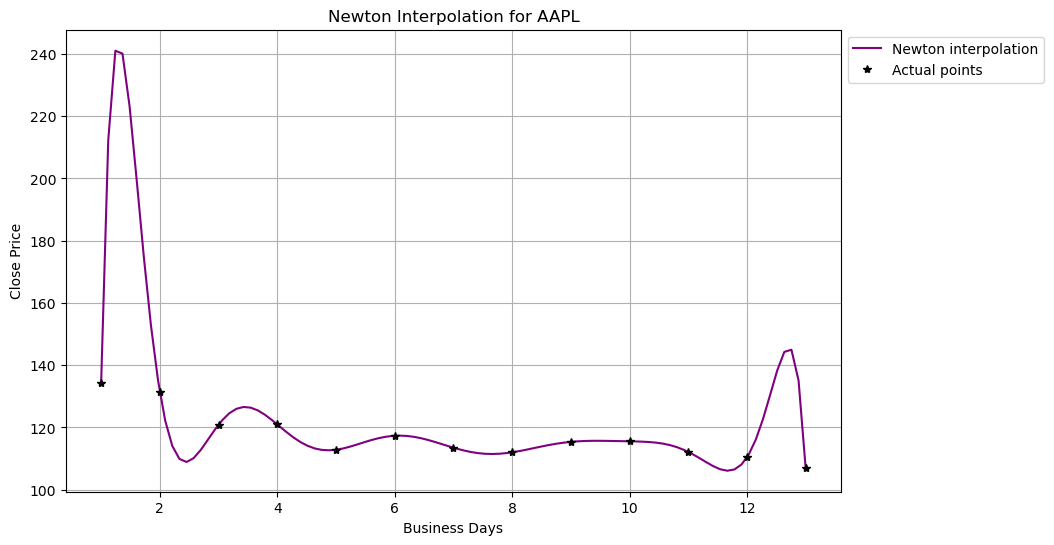

Interpolated price for AAPL for day x = 8.5: 113.8701905053548


In [15]:
# NEWTON INTERPOLATION

# Define x and y data
x = list(range(1, len(aapl) + 1))  # Business days starting from 1
y = aapl[('Close', 'AAPL')].tolist()  # Close prices

# Generate values for plotting the Newton interpolation
x1 = np.linspace(min(x), max(x), 100)  # 100 points for smooth plotting
y1 = [newton_interpolation(x, y, xi) for xi in x1]

# Plot the Newton interpolation and actual data points
plt.figure(figsize=(10, 6))
plt.plot(x1, y1, color='purple', label='Newton interpolation')
plt.plot(x, y, '*', color='black', label='Actual points')
plt.xlabel('Business Days')
plt.ylabel('Close Price')
plt.title('Newton Interpolation for AAPL')
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Interpolated price at x = 8.5 using Newton interpolation
interpolated_price = newton_interpolation(x, y, 8.5)
print(f"Interpolated price for AAPL for day x = 8.5: {interpolated_price}")

# Q9